## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  71.945784   508.670056  0.414780   7.234926  1.372489
1  70.289507  1449.145472  0.879809   6.691233  1.568394
2  13.833686   968.004979  0.837708   5.818754  1.600829
3  42.821050  1451.509633  0.151385   7.035331  1.349375
4  40.798138  1638.511781  0.517464  10.855739  1.442286


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.01755 | train_mse: 3.03093 | train_mae: 1.34434 |  0:00:00s
epoch 1  | loss: 0.67444 | train_mse: 2.66152 | train_mae: 1.19151 |  0:00:00s


epoch 2  | loss: 0.62148 | train_mse: 1.72041 | train_mae: 0.95537 |  0:00:00s
epoch 3  | loss: 0.57758 | train_mse: 1.32285 | train_mae: 0.85137 |  0:00:00s


epoch 4  | loss: 0.45492 | train_mse: 1.25857 | train_mae: 0.8714  |  0:00:00s
epoch 5  | loss: 0.47586 | train_mse: 1.67868 | train_mae: 0.97155 |  0:00:00s
epoch 6  | loss: 0.6282  | train_mse: 1.07627 | train_mae: 0.76264 |  0:00:00s


epoch 7  | loss: 0.37599 | train_mse: 0.65054 | train_mae: 0.58998 |  0:00:00s
epoch 8  | loss: 0.36233 | train_mse: 0.81067 | train_mae: 0.67089 |  0:00:01s
epoch 9  | loss: 0.39229 | train_mse: 0.76203 | train_mae: 0.65659 |  0:00:01s


epoch 10 | loss: 0.45477 | train_mse: 0.65304 | train_mae: 0.61386 |  0:00:01s
epoch 11 | loss: 0.29766 | train_mse: 0.67455 | train_mae: 0.63981 |  0:00:01s


epoch 12 | loss: 0.32077 | train_mse: 0.84284 | train_mae: 0.68217 |  0:00:01s
epoch 13 | loss: 0.38262 | train_mse: 1.048   | train_mae: 0.71943 |  0:00:01s


epoch 14 | loss: 0.28452 | train_mse: 0.84221 | train_mae: 0.62865 |  0:00:01s
epoch 15 | loss: 0.18271 | train_mse: 0.55707 | train_mae: 0.51544 |  0:00:01s
epoch 16 | loss: 0.30936 | train_mse: 0.42907 | train_mae: 0.4803  |  0:00:01s


epoch 17 | loss: 0.27026 | train_mse: 0.52639 | train_mae: 0.49078 |  0:00:02s
epoch 18 | loss: 0.27052 | train_mse: 0.47865 | train_mae: 0.47542 |  0:00:02s


epoch 19 | loss: 0.26978 | train_mse: 0.36834 | train_mae: 0.44858 |  0:00:02s
epoch 20 | loss: 0.24395 | train_mse: 0.27752 | train_mae: 0.39904 |  0:00:02s


epoch 21 | loss: 0.22124 | train_mse: 0.19446 | train_mae: 0.32717 |  0:00:02s
epoch 22 | loss: 0.21312 | train_mse: 0.20889 | train_mae: 0.35313 |  0:00:02s


epoch 23 | loss: 0.19938 | train_mse: 0.19201 | train_mae: 0.34227 |  0:00:02s
epoch 24 | loss: 0.20415 | train_mse: 0.1806  | train_mae: 0.33546 |  0:00:02s


epoch 25 | loss: 0.18585 | train_mse: 0.24743 | train_mae: 0.39739 |  0:00:02s
epoch 26 | loss: 0.20493 | train_mse: 0.25641 | train_mae: 0.3986  |  0:00:03s
epoch 27 | loss: 0.20806 | train_mse: 0.22221 | train_mae: 0.37508 |  0:00:03s


epoch 28 | loss: 0.16764 | train_mse: 0.22182 | train_mae: 0.37665 |  0:00:03s
epoch 29 | loss: 0.18071 | train_mse: 0.20824 | train_mae: 0.36459 |  0:00:03s


epoch 30 | loss: 0.23116 | train_mse: 0.1896  | train_mae: 0.34863 |  0:00:03s
epoch 31 | loss: 0.14922 | train_mse: 0.16059 | train_mae: 0.32197 |  0:00:03s


epoch 32 | loss: 0.18261 | train_mse: 0.11614 | train_mae: 0.28487 |  0:00:03s
epoch 33 | loss: 0.2688  | train_mse: 0.18349 | train_mae: 0.3344  |  0:00:03s
epoch 34 | loss: 0.13088 | train_mse: 0.2742  | train_mae: 0.37635 |  0:00:03s


epoch 35 | loss: 0.13335 | train_mse: 0.21281 | train_mae: 0.34889 |  0:00:03s
epoch 36 | loss: 0.16547 | train_mse: 0.16138 | train_mae: 0.31741 |  0:00:04s
epoch 37 | loss: 0.16786 | train_mse: 0.13966 | train_mae: 0.30501 |  0:00:04s


epoch 38 | loss: 0.29767 | train_mse: 0.12357 | train_mae: 0.28709 |  0:00:04s
epoch 39 | loss: 0.27734 | train_mse: 0.12044 | train_mae: 0.28139 |  0:00:04s
epoch 40 | loss: 0.30356 | train_mse: 0.19201 | train_mae: 0.32733 |  0:00:04s


epoch 41 | loss: 0.24703 | train_mse: 0.29012 | train_mae: 0.38889 |  0:00:04s
epoch 42 | loss: 0.36174 | train_mse: 0.18442 | train_mae: 0.33096 |  0:00:04s


epoch 43 | loss: 0.27245 | train_mse: 0.12247 | train_mae: 0.28236 |  0:00:04s
epoch 44 | loss: 0.12266 | train_mse: 0.12609 | train_mae: 0.28318 |  0:00:04s
epoch 45 | loss: 0.15745 | train_mse: 0.13572 | train_mae: 0.28691 |  0:00:04s


epoch 46 | loss: 0.41378 | train_mse: 0.1155  | train_mae: 0.26562 |  0:00:05s
epoch 47 | loss: 0.18232 | train_mse: 0.10796 | train_mae: 0.25651 |  0:00:05s
epoch 48 | loss: 0.13339 | train_mse: 0.11223 | train_mae: 0.25118 |  0:00:05s


epoch 49 | loss: 0.3438  | train_mse: 0.12791 | train_mae: 0.26484 |  0:00:05s
epoch 50 | loss: 0.15349 | train_mse: 0.21529 | train_mae: 0.32552 |  0:00:05s


epoch 51 | loss: 0.22375 | train_mse: 0.17314 | train_mae: 0.29425 |  0:00:05s
epoch 52 | loss: 0.16989 | train_mse: 0.17871 | train_mae: 0.32495 |  0:00:05s


epoch 53 | loss: 0.16069 | train_mse: 0.17673 | train_mae: 0.32796 |  0:00:05s


epoch 54 | loss: 0.13588 | train_mse: 0.12516 | train_mae: 0.2841  |  0:00:06s
epoch 55 | loss: 0.1299  | train_mse: 0.14238 | train_mae: 0.29557 |  0:00:06s
epoch 56 | loss: 0.15126 | train_mse: 0.14522 | train_mae: 0.28525 |  0:00:06s


epoch 57 | loss: 0.17545 | train_mse: 0.11817 | train_mae: 0.26275 |  0:00:06s


epoch 58 | loss: 0.14806 | train_mse: 0.13142 | train_mae: 0.27869 |  0:00:06s
epoch 59 | loss: 0.14944 | train_mse: 0.15024 | train_mae: 0.30483 |  0:00:06s
epoch 60 | loss: 0.1905  | train_mse: 0.17844 | train_mae: 0.31723 |  0:00:06s


epoch 61 | loss: 0.14648 | train_mse: 0.16265 | train_mae: 0.30977 |  0:00:06s
epoch 62 | loss: 0.1305  | train_mse: 0.14768 | train_mae: 0.29144 |  0:00:07s
epoch 63 | loss: 0.13962 | train_mse: 0.12605 | train_mae: 0.2694  |  0:00:07s


epoch 64 | loss: 0.09996 | train_mse: 0.11269 | train_mae: 0.27507 |  0:00:07s
epoch 65 | loss: 0.14567 | train_mse: 0.11645 | train_mae: 0.27561 |  0:00:07s
epoch 66 | loss: 0.17859 | train_mse: 0.10302 | train_mae: 0.25965 |  0:00:07s


epoch 67 | loss: 0.19783 | train_mse: 0.08995 | train_mae: 0.24678 |  0:00:07s
epoch 68 | loss: 0.14567 | train_mse: 0.08833 | train_mae: 0.23849 |  0:00:07s
epoch 69 | loss: 0.16562 | train_mse: 0.10229 | train_mae: 0.25407 |  0:00:07s


epoch 70 | loss: 0.21465 | train_mse: 0.09869 | train_mae: 0.25717 |  0:00:07s
epoch 71 | loss: 0.17792 | train_mse: 0.1035  | train_mae: 0.26737 |  0:00:07s
epoch 72 | loss: 0.27612 | train_mse: 0.11095 | train_mae: 0.27357 |  0:00:07s


epoch 73 | loss: 0.20756 | train_mse: 0.10002 | train_mae: 0.25396 |  0:00:07s
epoch 74 | loss: 0.10342 | train_mse: 0.09939 | train_mae: 0.24891 |  0:00:07s
epoch 75 | loss: 0.20467 | train_mse: 0.11963 | train_mae: 0.27036 |  0:00:08s


epoch 76 | loss: 0.1918  | train_mse: 0.12437 | train_mae: 0.27308 |  0:00:08s
epoch 77 | loss: 0.12069 | train_mse: 0.11191 | train_mae: 0.26843 |  0:00:08s
epoch 78 | loss: 0.14778 | train_mse: 0.10901 | train_mae: 0.27192 |  0:00:08s


epoch 79 | loss: 0.10427 | train_mse: 0.13032 | train_mae: 0.28961 |  0:00:08s
epoch 80 | loss: 0.1336  | train_mse: 0.14146 | train_mae: 0.29453 |  0:00:08s
epoch 81 | loss: 0.10348 | train_mse: 0.11933 | train_mae: 0.25781 |  0:00:08s


epoch 82 | loss: 0.12366 | train_mse: 0.11139 | train_mae: 0.2429  |  0:00:08s
epoch 83 | loss: 0.11121 | train_mse: 0.10704 | train_mae: 0.24471 |  0:00:08s
epoch 84 | loss: 0.16716 | train_mse: 0.09058 | train_mae: 0.22839 |  0:00:08s


epoch 85 | loss: 0.1133  | train_mse: 0.09005 | train_mae: 0.22748 |  0:00:08s
epoch 86 | loss: 0.15145 | train_mse: 0.09192 | train_mae: 0.23446 |  0:00:08s
epoch 87 | loss: 0.14942 | train_mse: 0.08321 | train_mae: 0.22413 |  0:00:09s


epoch 88 | loss: 0.1998  | train_mse: 0.09344 | train_mae: 0.23992 |  0:00:09s
epoch 89 | loss: 0.16936 | train_mse: 0.11538 | train_mae: 0.25681 |  0:00:09s
epoch 90 | loss: 0.09281 | train_mse: 0.10885 | train_mae: 0.26156 |  0:00:09s


epoch 91 | loss: 0.12239 | train_mse: 0.08651 | train_mae: 0.23503 |  0:00:09s
epoch 92 | loss: 0.271   | train_mse: 0.13172 | train_mae: 0.25994 |  0:00:09s


epoch 93 | loss: 0.17637 | train_mse: 0.09741 | train_mae: 0.23058 |  0:00:09s
epoch 94 | loss: 0.12998 | train_mse: 0.09231 | train_mae: 0.22853 |  0:00:09s
epoch 95 | loss: 0.12517 | train_mse: 0.10308 | train_mae: 0.24248 |  0:00:09s


epoch 96 | loss: 0.19926 | train_mse: 0.10225 | train_mae: 0.24669 |  0:00:09s
epoch 97 | loss: 0.1187  | train_mse: 0.08576 | train_mae: 0.23181 |  0:00:10s


epoch 98 | loss: 0.22187 | train_mse: 0.07719 | train_mae: 0.22997 |  0:00:10s
epoch 99 | loss: 0.14773 | train_mse: 0.07391 | train_mae: 0.22665 |  0:00:10s
epoch 100| loss: 0.20767 | train_mse: 0.07138 | train_mae: 0.21924 |  0:00:10s


epoch 101| loss: 0.15458 | train_mse: 0.07502 | train_mae: 0.22035 |  0:00:10s


epoch 102| loss: 0.11575 | train_mse: 0.08303 | train_mae: 0.22339 |  0:00:10s


epoch 103| loss: 0.14646 | train_mse: 0.11351 | train_mae: 0.25024 |  0:00:11s
epoch 104| loss: 0.11512 | train_mse: 0.12074 | train_mae: 0.2579  |  0:00:11s


epoch 105| loss: 0.19394 | train_mse: 0.1082  | train_mae: 0.25015 |  0:00:11s
epoch 106| loss: 0.11504 | train_mse: 0.08096 | train_mae: 0.21684 |  0:00:11s
epoch 107| loss: 0.09825 | train_mse: 0.07026 | train_mae: 0.20601 |  0:00:11s


epoch 108| loss: 0.10529 | train_mse: 0.07853 | train_mae: 0.21969 |  0:00:11s
epoch 109| loss: 0.22087 | train_mse: 0.08565 | train_mae: 0.22363 |  0:00:11s
epoch 110| loss: 0.13934 | train_mse: 0.0701  | train_mae: 0.20533 |  0:00:12s


epoch 111| loss: 0.15256 | train_mse: 0.06757 | train_mae: 0.20093 |  0:00:12s
epoch 112| loss: 0.17563 | train_mse: 0.06757 | train_mae: 0.20305 |  0:00:12s
epoch 113| loss: 0.07714 | train_mse: 0.06644 | train_mae: 0.19398 |  0:00:12s


epoch 114| loss: 0.32068 | train_mse: 0.06553 | train_mae: 0.19835 |  0:00:12s
epoch 115| loss: 0.10674 | train_mse: 0.07298 | train_mae: 0.21131 |  0:00:12s
epoch 116| loss: 0.10666 | train_mse: 0.08735 | train_mae: 0.23438 |  0:00:12s


epoch 117| loss: 0.17503 | train_mse: 0.07987 | train_mae: 0.22303 |  0:00:12s
epoch 118| loss: 0.18539 | train_mse: 0.0748  | train_mae: 0.21289 |  0:00:12s
epoch 119| loss: 0.07996 | train_mse: 0.07525 | train_mae: 0.21906 |  0:00:12s


epoch 120| loss: 0.1194  | train_mse: 0.0733  | train_mae: 0.21521 |  0:00:12s
epoch 121| loss: 0.12663 | train_mse: 0.07183 | train_mae: 0.21791 |  0:00:12s
epoch 122| loss: 0.12654 | train_mse: 0.07813 | train_mae: 0.22687 |  0:00:13s


epoch 123| loss: 0.11613 | train_mse: 0.07998 | train_mae: 0.23024 |  0:00:13s
epoch 124| loss: 0.09205 | train_mse: 0.08029 | train_mae: 0.22582 |  0:00:13s
epoch 125| loss: 0.18705 | train_mse: 0.06351 | train_mae: 0.2039  |  0:00:13s


epoch 126| loss: 0.20208 | train_mse: 0.06286 | train_mae: 0.19787 |  0:00:13s
epoch 127| loss: 0.11005 | train_mse: 0.07725 | train_mae: 0.2126  |  0:00:13s
epoch 128| loss: 0.09171 | train_mse: 0.07161 | train_mae: 0.21562 |  0:00:13s


epoch 129| loss: 0.1728  | train_mse: 0.07259 | train_mae: 0.21663 |  0:00:13s
epoch 130| loss: 0.14058 | train_mse: 0.07602 | train_mae: 0.22305 |  0:00:13s
epoch 131| loss: 0.09385 | train_mse: 0.08024 | train_mae: 0.22866 |  0:00:13s


epoch 132| loss: 0.12131 | train_mse: 0.07334 | train_mae: 0.21658 |  0:00:13s
epoch 133| loss: 0.09504 | train_mse: 0.06313 | train_mae: 0.20062 |  0:00:13s
epoch 134| loss: 0.08872 | train_mse: 0.08006 | train_mae: 0.21969 |  0:00:13s


epoch 135| loss: 0.12131 | train_mse: 0.08927 | train_mae: 0.22922 |  0:00:14s
epoch 136| loss: 0.18795 | train_mse: 0.0807  | train_mae: 0.22025 |  0:00:14s
epoch 137| loss: 0.09814 | train_mse: 0.08073 | train_mae: 0.21956 |  0:00:14s


epoch 138| loss: 0.11895 | train_mse: 0.07527 | train_mae: 0.20905 |  0:00:14s
epoch 139| loss: 0.12866 | train_mse: 0.07789 | train_mae: 0.20981 |  0:00:14s
epoch 140| loss: 0.11965 | train_mse: 0.09361 | train_mae: 0.22515 |  0:00:14s


epoch 141| loss: 0.12668 | train_mse: 0.1102  | train_mae: 0.24481 |  0:00:14s
epoch 142| loss: 0.11874 | train_mse: 0.0988  | train_mae: 0.2301  |  0:00:14s
epoch 143| loss: 0.13401 | train_mse: 0.08995 | train_mae: 0.21763 |  0:00:14s


epoch 144| loss: 0.13847 | train_mse: 0.07332 | train_mae: 0.21592 |  0:00:14s
epoch 145| loss: 0.20329 | train_mse: 0.06903 | train_mae: 0.21466 |  0:00:14s


epoch 146| loss: 0.1589  | train_mse: 0.06584 | train_mae: 0.2082  |  0:00:15s
epoch 147| loss: 0.12826 | train_mse: 0.06046 | train_mae: 0.19744 |  0:00:15s
epoch 148| loss: 0.14488 | train_mse: 0.05978 | train_mae: 0.19706 |  0:00:15s


epoch 149| loss: 0.1448  | train_mse: 0.06562 | train_mae: 0.20504 |  0:00:15s
epoch 150| loss: 0.11863 | train_mse: 0.06534 | train_mae: 0.20574 |  0:00:15s
epoch 151| loss: 0.13168 | train_mse: 0.06265 | train_mae: 0.19839 |  0:00:15s


epoch 152| loss: 0.08895 | train_mse: 0.0645  | train_mae: 0.20398 |  0:00:15s
epoch 153| loss: 0.16048 | train_mse: 0.06265 | train_mae: 0.20036 |  0:00:15s
epoch 154| loss: 0.08647 | train_mse: 0.06257 | train_mae: 0.20364 |  0:00:15s


epoch 155| loss: 0.08542 | train_mse: 0.05907 | train_mae: 0.1971  |  0:00:15s
epoch 156| loss: 0.13899 | train_mse: 0.05595 | train_mae: 0.18922 |  0:00:15s
epoch 157| loss: 0.09652 | train_mse: 0.05446 | train_mae: 0.18714 |  0:00:15s


epoch 158| loss: 0.13046 | train_mse: 0.04894 | train_mae: 0.17804 |  0:00:15s
epoch 159| loss: 0.08275 | train_mse: 0.06835 | train_mae: 0.21043 |  0:00:16s
epoch 160| loss: 0.14162 | train_mse: 0.10356 | train_mae: 0.24222 |  0:00:16s


epoch 161| loss: 0.07625 | train_mse: 0.09408 | train_mae: 0.22944 |  0:00:16s
epoch 162| loss: 0.11915 | train_mse: 0.09744 | train_mae: 0.22816 |  0:00:16s
epoch 163| loss: 0.18128 | train_mse: 0.10931 | train_mae: 0.23884 |  0:00:16s


epoch 164| loss: 0.20028 | train_mse: 0.09187 | train_mae: 0.22867 |  0:00:16s
epoch 165| loss: 0.13237 | train_mse: 0.09198 | train_mae: 0.23324 |  0:00:16s
epoch 166| loss: 0.13018 | train_mse: 0.07662 | train_mae: 0.21961 |  0:00:16s


epoch 167| loss: 0.10755 | train_mse: 0.08262 | train_mae: 0.23483 |  0:00:16s
epoch 168| loss: 0.10822 | train_mse: 0.14699 | train_mae: 0.28723 |  0:00:16s
epoch 169| loss: 0.19613 | train_mse: 0.18422 | train_mae: 0.30338 |  0:00:16s


epoch 170| loss: 0.14128 | train_mse: 0.1431  | train_mae: 0.26705 |  0:00:16s
epoch 171| loss: 0.11645 | train_mse: 0.06364 | train_mae: 0.19964 |  0:00:16s
epoch 172| loss: 0.19903 | train_mse: 0.06224 | train_mae: 0.19197 |  0:00:17s


epoch 173| loss: 0.15647 | train_mse: 0.06049 | train_mae: 0.18914 |  0:00:17s
epoch 174| loss: 0.15932 | train_mse: 0.06938 | train_mae: 0.2115  |  0:00:17s
epoch 175| loss: 0.1088  | train_mse: 0.06486 | train_mae: 0.20371 |  0:00:17s


epoch 176| loss: 0.10748 | train_mse: 0.06824 | train_mae: 0.20358 |  0:00:17s
epoch 177| loss: 0.14941 | train_mse: 0.05735 | train_mae: 0.19125 |  0:00:17s
epoch 178| loss: 0.16104 | train_mse: 0.07629 | train_mae: 0.21471 |  0:00:17s


epoch 179| loss: 0.09859 | train_mse: 0.0826  | train_mae: 0.2172  |  0:00:17s
epoch 180| loss: 0.09103 | train_mse: 0.07746 | train_mae: 0.2165  |  0:00:17s
epoch 181| loss: 0.10145 | train_mse: 0.06681 | train_mae: 0.19964 |  0:00:17s


epoch 182| loss: 0.12887 | train_mse: 0.06169 | train_mae: 0.19258 |  0:00:17s
epoch 183| loss: 0.17122 | train_mse: 0.0672  | train_mae: 0.20054 |  0:00:17s
epoch 184| loss: 0.14117 | train_mse: 0.06127 | train_mae: 0.19409 |  0:00:17s


epoch 185| loss: 0.08456 | train_mse: 0.05538 | train_mae: 0.19023 |  0:00:18s
epoch 186| loss: 0.11021 | train_mse: 0.05655 | train_mae: 0.19483 |  0:00:18s
epoch 187| loss: 0.10982 | train_mse: 0.05381 | train_mae: 0.18279 |  0:00:18s


epoch 188| loss: 0.14695 | train_mse: 0.0819  | train_mae: 0.2074  |  0:00:18s
epoch 189| loss: 0.10725 | train_mse: 0.06775 | train_mae: 0.19627 |  0:00:18s
epoch 190| loss: 0.07902 | train_mse: 0.0529  | train_mae: 0.18704 |  0:00:18s


epoch 191| loss: 0.14764 | train_mse: 0.05616 | train_mae: 0.19152 |  0:00:18s
epoch 192| loss: 0.15549 | train_mse: 0.07206 | train_mae: 0.2183  |  0:00:18s
epoch 193| loss: 0.08362 | train_mse: 0.09529 | train_mae: 0.23742 |  0:00:18s


epoch 194| loss: 0.11611 | train_mse: 0.0862  | train_mae: 0.23391 |  0:00:18s
epoch 195| loss: 0.07528 | train_mse: 0.08051 | train_mae: 0.2286  |  0:00:18s
epoch 196| loss: 0.08041 | train_mse: 0.06918 | train_mae: 0.20945 |  0:00:18s


epoch 197| loss: 0.09032 | train_mse: 0.0587  | train_mae: 0.19681 |  0:00:18s
epoch 198| loss: 0.12095 | train_mse: 0.06992 | train_mae: 0.21087 |  0:00:19s
epoch 199| loss: 0.10827 | train_mse: 0.05948 | train_mae: 0.19614 |  0:00:19s


epoch 200| loss: 0.08018 | train_mse: 0.05415 | train_mae: 0.19007 |  0:00:19s
epoch 201| loss: 0.11412 | train_mse: 0.05681 | train_mae: 0.18475 |  0:00:19s
epoch 202| loss: 0.17416 | train_mse: 0.06685 | train_mae: 0.1951  |  0:00:19s


epoch 203| loss: 0.17426 | train_mse: 0.08187 | train_mae: 0.2199  |  0:00:19s
epoch 204| loss: 0.18238 | train_mse: 0.08339 | train_mae: 0.22568 |  0:00:19s
epoch 205| loss: 0.15461 | train_mse: 0.06341 | train_mae: 0.20022 |  0:00:19s


epoch 206| loss: 0.16624 | train_mse: 0.06246 | train_mae: 0.20039 |  0:00:19s
epoch 207| loss: 0.07961 | train_mse: 0.06658 | train_mae: 0.20353 |  0:00:19s
epoch 208| loss: 0.08454 | train_mse: 0.07286 | train_mae: 0.20834 |  0:00:19s

Early stopping occurred at epoch 208 with best_epoch = 158 and best_train_mae = 0.17804
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

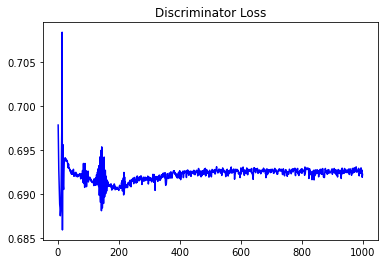

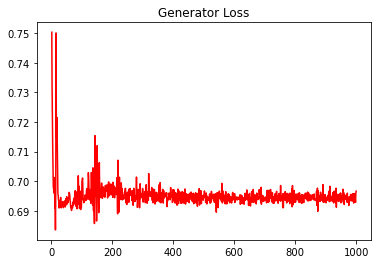

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.7747158162983919


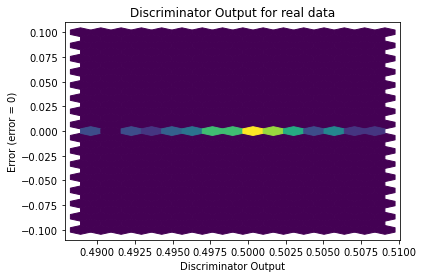

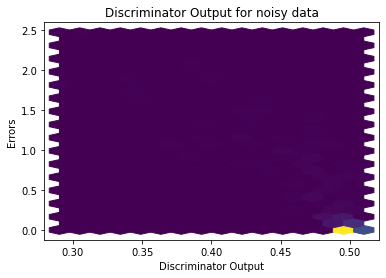

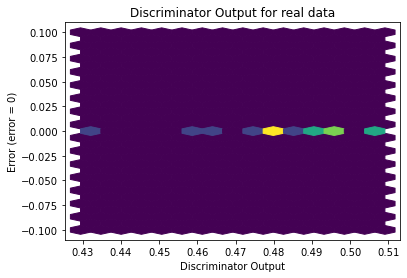

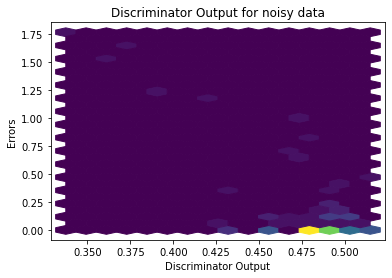

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


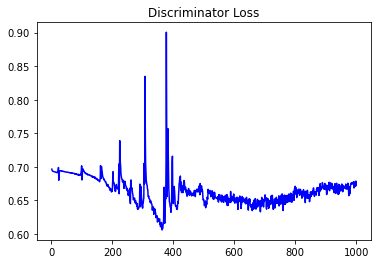

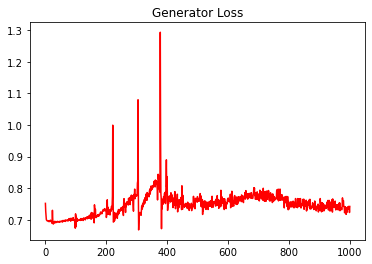

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.785759165603089


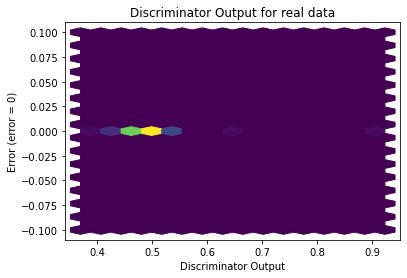

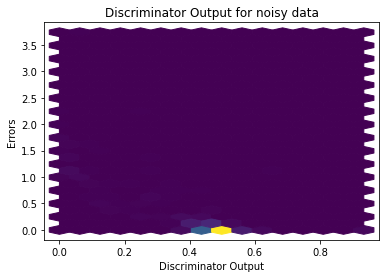

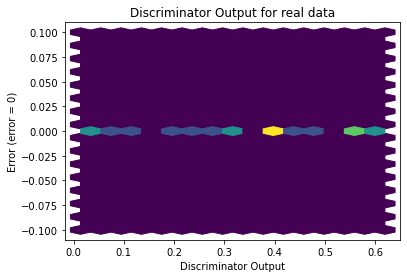

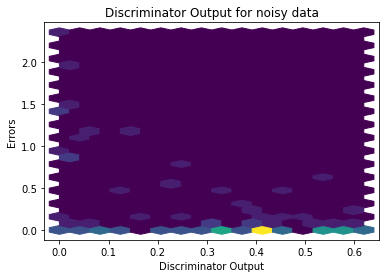

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1087]], requires_grad=True)
